<a href="https://colab.research.google.com/github/lindseyvanosky/Simple-Neural-Network-Exercise/blob/main/LV_Simple_Neural_Network_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Neural Network Exercise
- Lindsey Vanosky 
- 08.02.22

#Import, Upload & Inspect

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report



filename = "/content/drive/MyDrive/Coding Dojo/03 Stack 3: Advanced Machine Learning/Data Sets/heart - heart.csv"
df = pd.read_csv(filename)

#Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#Preprocessing

In [ ]:
x = df.drop(columns = ["HeartDisease"])
y = df["HeartDisease"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown = "ignore", sparse = False)

num_select = make_column_selector(dtype_include = "number")
cat_select = make_column_selector(dtype_include = "object")

num_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(ohe)

num_tupe = (num_pipe, num_select)
cat_tupe = (cat_pipe, cat_select)

preprocessor = make_column_transformer(num_tupe, cat_tupe)

In [ ]:
preprocessor.fit(x_train, y_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9bdfd5410>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9bdfd5310>)])

In [ ]:
x_train_processed = preprocessor.transform(x_train)
x_test_processed = preprocessor.transform(x_test)


#Model 1

##Instantiation 

In [ ]:
input_shape = x_train_processed.shape[1]
input_shape

20

In [ ]:
model = Sequential()

#first hidden layer
model.add(Dense(20, input_dim = input_shape, activation = "relu"))

#second hidden layer
model.add(Dense(10, activation = "relu"))

#output layer
model.add(Dense(1, activation = "sigmoid"))

##Compiling & Fitting the Model

In [ ]:
model.compile(loss = "bce", optimizer = "adam")

In [ ]:
x_train_processed = pd.DataFrame(x_train_processed)
x_test_processed = pd.DataFrame(x_test_processed)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
history = model.fit(x_train_processed, y_train, validation_data = (x_test_processed, y_test), epochs = 10)

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 0.6106 - val_loss: 0.5589
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 0.5347 - val_loss: 0.4910
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 0.4749 - val_loss: 0.4384
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 0.4278 - val_loss: 0.3976
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3925 - val_loss: 0.3744
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3711 - val_loss: 0.3579
Epoch 7/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3553 - val_loss: 0.3498
Epoch 8/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3446 - val_loss: 0.3449
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3364 - val_loss: 0.3389
Epoch 10/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3302 - val_loss: 0.3347


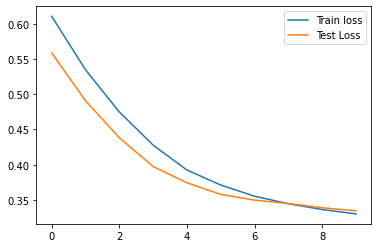

In [ ]:
plt.plot(history.history["loss"], label = "Train loss")
plt.plot(history.history["val_loss"], label = "Test Loss")
plt.legend();

With 10 epochs, 20 first layer nodes and 10 second layer node we were able to get a test score of 0.33. 

#Model 2

In [ ]:
model_2 = Sequential()

#first hidden layer
model_2.add(Dense(15, input_dim = input_shape, activation = "relu"))

#second hidden layer
model_2.add(Dense(7, activation = "relu"))

#output layer
model_2.add(Dense(1, activation = "sigmoid"))

In [ ]:
model_2.compile(loss = "bce", optimizer = "adam")

In [ ]:
history_2 = model_2.fit(x_train_processed, y_train, validation_data = (x_test_processed, y_test), epochs = 12)

Epoch 1/12
22/22 [==============================] - 1s 14ms/step - loss: 0.7371 - val_loss: 0.6966
Epoch 2/12
22/22 [==============================] - 0s 5ms/step - loss: 0.6872 - val_loss: 0.6581
Epoch 3/12
22/22 [==============================] - 0s 5ms/step - loss: 0.6482 - val_loss: 0.6217
Epoch 4/12
22/22 [==============================] - 0s 6ms/step - loss: 0.6134 - val_loss: 0.5847
Epoch 5/12
22/22 [==============================] - 0s 5ms/step - loss: 0.5797 - val_loss: 0.5513
Epoch 6/12
22/22 [==============================] - 0s 5ms/step - loss: 0.5499 - val_loss: 0.5186
Epoch 7/12
22/22 [==============================] - 0s 5ms/step - loss: 0.5214 - val_loss: 0.4902
Epoch 8/12
22/22 [==============================] - 0s 4ms/step - loss: 0.4971 - val_loss: 0.4638
Epoch 9/12
22/22 [==============================] - 0s 3ms/step - loss: 0.4735 - val_loss: 0.4393
Epoch 10/12
22/22 [==============================] - 0s 3ms/step - loss: 0.4518 - val_loss: 0.4171
Epoch 11/12
22/22 

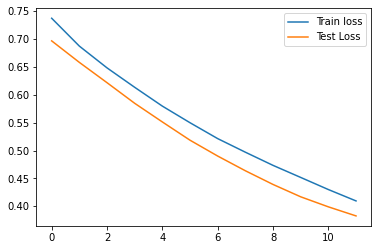

In [ ]:
plt.plot(history_2.history["loss"], label = "Train loss")
plt.plot(history_2.history["val_loss"], label = "Test Loss")
plt.legend();

Model 2 used 15 first layer nodes, 7 second layer nodes and 12 epochs. The loss score resulted in .38, a slight increase. 

#Model 3

In [ ]:
model_3 = Sequential()

#first hidden layer
model_3.add(Dense(12, input_dim = input_shape, activation = "relu"))

#second hidden layer
model_3.add(Dense(8, activation = "relu"))

#output layer
model_3.add(Dense(1, activation = "sigmoid"))

In [ ]:
model_3.compile(loss = "bce", optimizer = "adam")

In [ ]:
history_3 = model_3.fit(x_train_processed, y_train, validation_data = (x_test_processed, y_test), epochs = 15)

Epoch 1/15
22/22 [==============================] - 0s 8ms/step - loss: 0.3905 - val_loss: 0.3824
Epoch 2/15
22/22 [==============================] - 0s 6ms/step - loss: 0.3761 - val_loss: 0.3699
Epoch 3/15
22/22 [==============================] - 0s 6ms/step - loss: 0.3640 - val_loss: 0.3609
Epoch 4/15
22/22 [==============================] - 0s 5ms/step - loss: 0.3529 - val_loss: 0.3484
Epoch 5/15
22/22 [==============================] - 0s 4ms/step - loss: 0.3447 - val_loss: 0.3408
Epoch 6/15
22/22 [==============================] - 0s 4ms/step - loss: 0.3380 - val_loss: 0.3375
Epoch 7/15
22/22 [==============================] - 0s 4ms/step - loss: 0.3330 - val_loss: 0.3309
Epoch 8/15
22/22 [==============================] - 0s 3ms/step - loss: 0.3294 - val_loss: 0.3298
Epoch 9/15
22/22 [==============================] - 0s 3ms/step - loss: 0.3253 - val_loss: 0.3249
Epoch 10/15
22/22 [==============================] - 0s 3ms/step - loss: 0.3223 - val_loss: 0.3223
Epoch 11/15
22/22 [

This was our best scoring model with 12 first layer nodes, 8 second layer nodes and 15 epochs. We were able to get our loss score down to .31